<a target="_blank" href="https://colab.research.google.com/github/bettercodepaul/machine_learning_workshop/blob/main/Neural_Networks.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## !!! WICHTIG: ÄNDERT DIE RUNTIME ZUERST AUF T4 GPU: Runtime > Change runtime Type
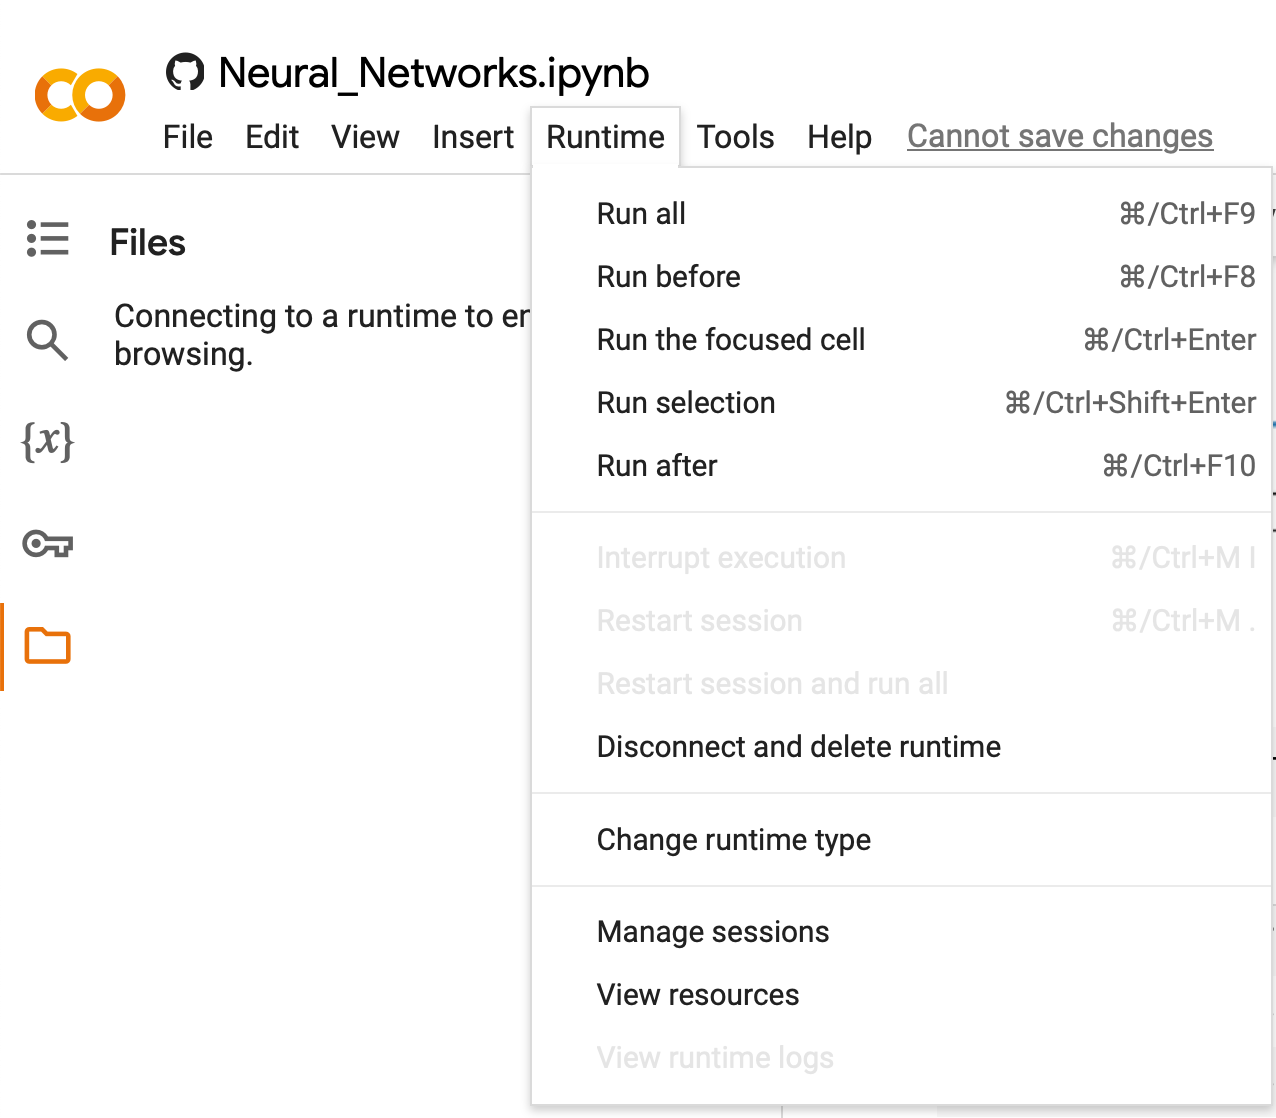

In [ ]:
!pip install timm

In [ ]:
import os
import timm
from fastai.vision.all import *
from IPython.display import Image

In [ ]:
# download MNIST data set
DATA_URL = "https://github.com/bettercodepaul/machine_learning_workshop/releases/download/data/mnist.tgz"
LOCAL_DATA_FILE_NAME = os.path.basename(DATA_URL)
urllib.request.urlretrieve(DATA_URL, LOCAL_DATA_FILE_NAME)

In [ ]:
!tar -zxf mnist.tgz

In [ ]:
# download excercises and utility functions
EXERCISES_URL = "https://raw.githubusercontent.com/bettercodepaul/machine_learning_workshop/main/exercises.py"
urllib.request.urlretrieve(EXERCISES_URL, os.path.basename(EXERCISES_URL))

In [ ]:
from exercises import *

# Multi Layer Perceptron

Wir starten mit dem Training eines einfachen Multi Layer Perceptron. Wir nutzen für das Training die Bibliothek fast.ai die auf PyTorch aufsetzt.

Wir nutzen die Bilder des MNIST-Datensatzes (wie aus dem Video)...

In [ ]:
!ls /content/mnist

In [ ]:
!ls /content/mnist/train

In [ ]:
path = "/content/mnist"
trn_path = path + "/train"

In [ ]:
# die Bilder aus dem Trainingsordner laden, 20% der Bilder für die Validierung und eine Batch-Größe von 256
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, bs=256)

In [ ]:
# wir können uns einen Batch probehalber ausgeben (reduziert auf 9 Bilder)
dls.show_batch(max_n=9)

Welche Dimension wird der Input in unser neuronales Netz haben?

In [ ]:
X, y = dls.one_batch()
print(f"Input Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

In das neuronale Netzwerk wird `X` mit 256 Bildern mit jeweils 3 Kanälen (RGB) und 28x28 Pixel eingegeben. Für jedes der 256 Bilder gibt es genau eine Kategorie im Target `y`. Hier z.B. die ersten 10 Targets...

In [ ]:
y[0:10]

Die Kategorien können wir auch über das "Vokabular" des Dataloaders ansehen.

In [ ]:
class_names = dls.vocab
class_count = len(class_names)

print(f"{class_count} Klassen: {class_names}")

Obwohl wir die Bilder als RGB einlesen, enthalten sie keine Farbinformationen. Wir fassen deshalb die 3-Kanäle mit der Funktion `mean` zu einem zusammen.

In [ ]:
X_single_channel = X.mean(dim=1)
X_single_channel.shape

Mit der Funktion `view` können wir die zweidimensionalen Bilder in eine Dimension projizieren, bevor sie im neuronalen Netzwerk weiter verarbeitet werden.

In [ ]:
X_flatten = X_single_channel.view(-1, 28*28)
X_flatten.shape

Wir definieren jetzt ein einfaches Multi Layer Perceptron mit der Aktivierungsfunktion ReLU.

In [ ]:
class SimpleMlp(nn.Module):
    def __init__(self, width, height, hidden_1_size, hidden_2_size, output_size):
        super().__init__()
        self.width = width
        self.height = height
        self.output_size = output_size
        self.input_layer = nn.Linear(width*height, hidden_1_size, bias=True)
        self.hidden_layer = nn.Linear(hidden_1_size, hidden_2_size, bias=True)
        self.output_layer = nn.Linear(hidden_2_size, output_size, bias=True)

    def forward(self, xb):
        # RGB-Channel zusammenfassen und Projektion auf 1D
        x = xb.mean(dim=1).view(-1, self.width*self.height)
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        return self.output_layer(x)

In [ ]:
# Modell erstellen und auf das Gerät laden (GPU/CPU/MPS) auf dem der Dataloader operiert
model = SimpleMlp(28, 28, 16, 16, 10).to(dls.device)

In [ ]:
# zur Erinnerung der Batch umfasst 256 Bilder, 3 Kanäle für RGB und 28x28 Pixel
X.shape

In [ ]:
# wir schicken den Batch durch das Modell
result = model.forward(X)

In [ ]:
# und erhalten für jedes der 256 Bilder und jede Klasse einen Wert
result.shape

In [ ]:
# die Werte sind aber aktuell wenig sinnvoll, weil das Netz nicht trainiert wurde
result[0]

Mit einem Learner können wir ein definiertes Modell trainieren.

In [ ]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, bs=256)
learn = Learner(
    dls,
    model=SimpleMlp(28, 28, 16, 16, 10),
    loss_func=nn.CrossEntropyLoss(),
    metrics=accuracy
)

Für 3 Epochen trainieren mit einer initialen Lernrate von `0.01`.

In [ ]:
learn.fit_one_cycle(3, 0.01)

Die Loss-Values während des Trainings können wir als Diagramm ausgeben.

In [ ]:
learn.recorder.plot_loss()

# Übung mit einem MLP und MNIST

Probiere unterschiedliche Hyperparameter aus:

- Was passiert, wenn du die Batchgröße reduzierst oder erhöhst?
- Was passiert, wenn du die initiale Lernrate reduzierst oder erhöhst?
- Was passiert, wenn du die Größe der Hidden-Layers veränderst, vielleicht sogar kleiner als die Output-Layer wählst?
- Du kannst andere Aktivierungsfunktionen ausprobieren, z.B. `F.sigmoid` oder `F.tanh`

In [ ]:
# Platz für deinen Code

# Übung mit einem MLP und einem WhichCar-Datensatz

Anstatt der ollen Ziffern aus dem MNIST-Datensatz versuchen wir uns jetzt an schicken Autos aus einem Datensatz, mit dem wir das neuronale Netz für unsere WhichCar-App trainiert haben. Mal schauen, wie gut wir die Typklassen der Autos vorhersagen können!

In [ ]:
# download mercedes-12k data set
DATA_URL = "https://github.com/bettercodepaul/machine_learning_workshop/releases/download/data/mercedes-12k.tgz"
LOCAL_DATA_FILE_NAME = os.path.basename(DATA_URL)
urllib.request.urlretrieve(DATA_URL, LOCAL_DATA_FILE_NAME)

In [ ]:
!tar -zxf mercedes-12k.tgz

In [ ]:
trn_path = "/content/mercedes-12k/train"
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, bs=16, item_tfms=Resize(224))

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
q8.question()

In [ ]:
q8_width=...
q8_height=...

In [ ]:
q8.check(q8_width, q8_height)

In [ ]:
q9.question()

In [ ]:
q9_output_size = ...

In [ ]:
q9.check(q9_output_size)

In [ ]:
q10.question()

In [ ]:
q10_model = ...

In [ ]:
q10.check(q10_model)

In [ ]:
q11.question()

In [ ]:
q11_learn = ...

In [ ]:
q11.check(q11_learn)

# Convolutional Networks und Standard-Architekturen

Mit unserem einfachen MLP werden wir nicht besonders weit kommen. Anstatt jetzt selber zu forschen, was für eine Modellarchitektur funktionieren könnte, nehmen wir eine vordefinierte Architektur, die bekanntermaßen gut funktioniert.

In [ ]:
learn = vision_learner(dls, "resnet18", pretrained=False, metrics=accuracy, path='.').to_fp16()

In [ ]:
learn.fit_one_cycle(3, 0.01)

In [ ]:
learn.recorder.plot_loss()

Das Training kann deutlich verbessert werden, in dem wir ein Modell nutzen, das schon auf einem anderen Datensatz vortrainiert wurde (`pretrained=True`).

In [ ]:
learn = vision_learner(dls, "resnet18", pretrained=True, metrics=accuracy, path='.').to_fp16()

In [ ]:
learn.fit_one_cycle(3, 0.01)

In [ ]:
learn.recorder.plot_loss()

Eine weitere Verbesserung können wir durch eine andere Architektur erreichen.

In [ ]:
# für weitere Modelle und Benchmarks siehe auch https://huggingface.co/timm
learn = vision_learner(dls, "convnextv2_tiny", pretrained=True, metrics=accuracy, path='.').to_fp16()

In [ ]:
learn.fit_one_cycle(3, 0.01)

Ganz tief in die Trickkiste gegriffen, können wir das Modell noch weiter verbessern. Wir nutzen jetzt größere Bilder und verändern die Bilder zufällig während des Trainings, so dass das Modell das gleiche Bild im Training nicht doppelt zu sehen bekommt.

In [ ]:
# Jetzt kannst Du noch probieren die Genauigkeit in unbekannte Höhen zu treiben :-)